# Phase 1: Exploratory Data Analysis & Data Processing

Before building the ML Classifier Model, we need to explore the data set that we will be using to train the model. Specifically we need to understand what sort of features are used to diagnose breast cancer and what are the decisions that the ML model can make based on the features. 

First we will import the .csv file into the notebook to start doing our EDA.

In [85]:
import pandas as pd

data = pd.read_csv("data.csv")

data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


We can use the .describe() function to find the basic statistical information about each of the features. The .T function is just to transverse the data so that the features are the rows and the statistical information is the columnns.

In [86]:
print(data.describe().T)

                         count          mean           std          min  \
id                       569.0  3.037183e+07  1.250206e+08  8670.000000   
radius_mean              569.0  1.412729e+01  3.524049e+00     6.981000   
texture_mean             569.0  1.928965e+01  4.301036e+00     9.710000   
perimeter_mean           569.0  9.196903e+01  2.429898e+01    43.790000   
area_mean                569.0  6.548891e+02  3.519141e+02   143.500000   
smoothness_mean          569.0  9.636028e-02  1.406413e-02     0.052630   
compactness_mean         569.0  1.043410e-01  5.281276e-02     0.019380   
concavity_mean           569.0  8.879932e-02  7.971981e-02     0.000000   
concave points_mean      569.0  4.891915e-02  3.880284e-02     0.000000   
symmetry_mean            569.0  1.811619e-01  2.741428e-02     0.106000   
fractal_dimension_mean   569.0  6.279761e-02  7.060363e-03     0.049960   
radius_se                569.0  4.051721e-01  2.773127e-01     0.111500   
texture_se               

When we start to do the EDA, we see that the values range greatly such that we have really small numbers and large numbers. This becomes a problem when we start training our model since this wide range can impact the model's performance. Later we will perform **normalization** to keep values between 0 and 1.

Next we are going to visualize the number of diagnosis' as M (malignant) or B (benign). 

In [87]:
import matplotlib.pylab as plt

import seaborn as sns

Text(0.5, 0, 'Diagnosis')

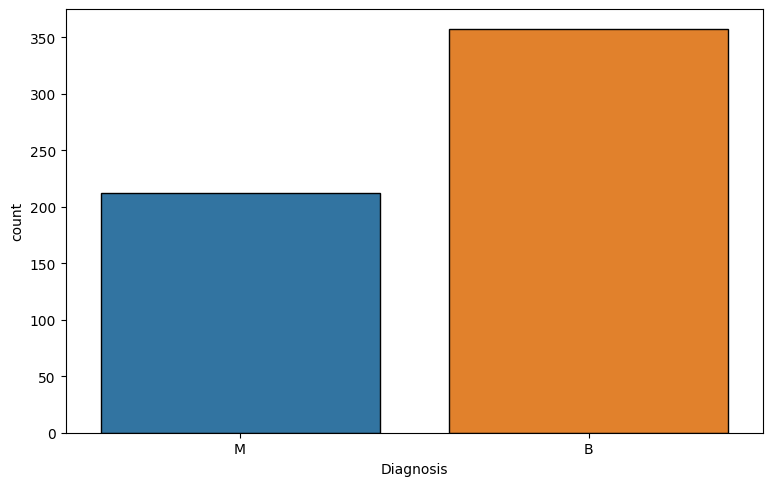

In [88]:
plt.figure(figsize=(9, 5.5))

sns.countplot(x='diagnosis', data = data, edgecolor = 'black', hue ='diagnosis')

plt.xlabel("Diagnosis")

We see that there are more breast cancer tumors diagnosed as benign than malignant, meaning that our classification model will make a binary decision. We can see that the data is unbalanced between the 2 diagnosis', which can be a problem during training model, because the model can have a biase towards a majority class. For now we will use the unbalanced data to train the model.

Preferably we would like to use a balanced data set to prevent biased decisions or classifications. We can fix this by sampling more cases in the minority class or adjust the weighting of the minority class. 

Before we start using the data to build the model, we have to make show that the data does contain null data.

In [89]:
print(data.isnull().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

It seems like we don't have any data points that are null, which is good. If we do have null data points, then we have to drop those data points or fill it with a value that makes sense in the context of the data.

Let's just see the different data types that are present for each of the features.

In [90]:
print(data.dtypes)

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In order to train the ML Classifier to determine a diagnosis, we have to convert the diagnosis into numbers. Since it is only a binary class decision, we can use 0 and 1 to represent B and M, respectively.

In [91]:
print("Distribution of data: ", data['diagnosis'].value_counts())

Distribution of data:  diagnosis
B    357
M    212
Name: count, dtype: int64


We know that the diagnosis feature will only contain 2 unique values: B and M.

In [92]:
import numpy as np

print("The unique diagnosis before encoding are: ", np.unique(data['diagnosis']))

The unique diagnosis before encoding are:  ['B' 'M']


Now we will change these unique values to 0 and 1.

In [93]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

y = data['diagnosis'].values

Y = labelencoder.fit_transform(y)

print("The unique diagnosis after encoding are: ", np.unique(Y))

The unique diagnosis after encoding are:  [0 1]


Good, now we have the Y values encoded as 0 and 1 corresponding to B and M, respectively. 

## Normalization

Next, we have to make sure that we normalize the values for the features of the tumor since the values for some features are on orders of 10. Normalization involves transforming the values to range from 0 to 1. Note that the X values are the features of the tumor in each case, not inlcuding the ID and the diagnosis.

In [94]:
# We drop the diagnosis and id columns because one is the Y variable
# and the other is not a feature.

X = data.drop(labels = ["diagnosis", "id"], axis = 1)
print(X.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

We see that the last column is unnamed and contains no values, so we will remove this last column to avoid any problems in the future when training the model.

In [95]:
X = X.loc[:, ~X.columns.str.contains('^Unnamed')]
print(X.describe().T)

                         count        mean         std         min  \
radius_mean              569.0   14.127292    3.524049    6.981000   
texture_mean             569.0   19.289649    4.301036    9.710000   
perimeter_mean           569.0   91.969033   24.298981   43.790000   
area_mean                569.0  654.889104  351.914129  143.500000   
smoothness_mean          569.0    0.096360    0.014064    0.052630   
compactness_mean         569.0    0.104341    0.052813    0.019380   
concavity_mean           569.0    0.088799    0.079720    0.000000   
concave points_mean      569.0    0.048919    0.038803    0.000000   
symmetry_mean            569.0    0.181162    0.027414    0.106000   
fractal_dimension_mean   569.0    0.062798    0.007060    0.049960   
radius_se                569.0    0.405172    0.277313    0.111500   
texture_se               569.0    1.216853    0.551648    0.360200   
perimeter_se             569.0    2.866059    2.021855    0.757000   
area_se             

As demonstrated again, it is crucial that we normalize the values since we have values that range from 0.003 to 880. Training our model on these numbers may lead to biasing and a less effective model.

We will be using MinMaxScaler to scale the values between 0 and 1. There are other normalization tools avaliable, which will outlined in the associated presentation with this project.

In [96]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


Now we see that the values for each of the features are between 0 and 1, this means that the values have successfully normalized.

We will export both the X and Y values as separate .csv files to use in the next step where we will start building the ML model.

In [99]:
X = pd.DataFrame(X)
Y = pd.DataFrame(Y)

In [100]:
X.to_csv("X_data")
Y.to_csv("Y_data")